# ТЕСТОВОЕ ЗАДАНИЕ. Страховой Дом ВСК.

Данные взяты из файла **Задание (пролонгация)**.xlsx

Файл содержит следующие данные:
* id - ID договора
* Filial - Филиал продажи
* Type_ts - Тип ТС
* passport_region - Регион по серии паспорта
* VIP	VIP - клиент
* Brand - Марка ТС
* Model - Модель ТС
* Yr_production - Год выпуска ТС
* GAP - GAP застрахован
* married	- Брак
* KBM	- КБМ
* KBM_prol_est - Прогноз КБМ (пролонгация)
* delta_kbm - Изменение КБМ
* deduct - Тип франшизы
* deduct_amount - Сумма франшизы (0 -без франшизы;20000- - франшиза <=20000; 20000+ - франшиза >20000)
* product - Продукт
* Bank - Машина в залоге банка
* channel - map - Канал
* category - Тип бизнеса
* kvs_type - Тип ЛДУ
* Age - Возраст
* Exp - Стаж
* discount - Скидка к СППГ
* Amount - gr	Страховая сумм (сгруппированная)
* sex - Пол
* premium_car - Премиальное ТС
* price_gr - Сгруппированный тариф (руб.)
* price_prc - Сгруппированный тариф (премия к сумме покрытия)
* OSAGO_clnt - Клиент ОСАГО
* target - Таргет (0 - не пролонгирован; 1 - пролонгирован; -1 - тестовая выборка)

Этапы выполнения тестового задания:
1. Обзор данных:
    * ипортирование библиотек;
    * подгрузка данных;
    * обзор даннах.
2. Предобработка данных:
    * объединение таблиц action_train и person;
    * проверка на NAN;
    * приведение типов;
    * проверка на дубликаты.
3. Исследовательский анализ:
    * проверка на мультиколлинеарность;
    * проверка баланса классов.
4. Подготовка данных к обучению:
    * удаление неинформативных признаков;
    * разделение обучающей выборки на train и valid подвыборки;
    * кодирование категориальных признаков.
5. Обучение и валидация моделей.
7. Классификация test выборки.

Данные взяты из файла **Задание (пролонгация)**.xlsx

Файл содержит следующие данные:
* id - ID договора
* Filial - Филиал продажи
* Type_ts - Тип ТС
* passport_region - Регион по серии паспорта
* VIP	VIP - клиент
* Brand - Марка ТС
* Model - Модель ТС
* Yr_production - Год выпуска ТС
* GAP - GAP застрахован
* married	- Брак
* KBM	- КБМ
* KBM_prol_est - Прогноз КБМ (пролонгация)
* delta_kbm - Изменение КБМ
* deduct - Тип франшизы
* deduct_amount - Сумма франшизы (0 -без франшизы;20000- - франшиза <=20000; 20000+ - франшиза >20000)
* product - Продукт
* Bank - Машина в залоге банка
* channel - map - Канал
* category - Тип бизнеса
* kvs_type - Тип ЛДУ
* Age - Возраст
* Exp - Стаж
* discount - Скидка к СППГ
* Amount - gr	Страховая сумм (сгруппированная)
* sex - Пол
* premium_car - Премиальное ТС
* price_gr - Сгруппированный тариф (руб.)
* price_prc - Сгруппированный тариф (премия к сумме покрытия)
* OSAGO_clnt - Клиент ОСАГО
* target - Таргет (0 - не пролонгирован; 1 - пролонгирован; -1 - тестовая выборка)

## ОБЗОР ДАННЫХ

### Импорты

In [1]:
# Импорт стандартных библиотек
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from IPython.display import display, HTML
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer

# Импорт сторонних библиотек
import phik
import warnings
import xgboost as xgb
from catboost import CatBoostClassifier
from category_encoders.binary import BinaryEncoder

In [2]:
# Установка random_state и seed
def set_all_seeds(RANDOM_SEED):
    seed = RANDOM_SEED
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

RANDOM_STATE = 42
RANDOM_SEED = RANDOM_STATE
set_all_seeds(RANDOM_SEED)

In [3]:
# Вывод всех колонок датафрейма
pd.set_option('display.max_columns', None)
# Игнорирование ошибок
warnings.filterwarnings('ignore')

### Подгрузка данных

In [4]:
df = pd.read_excel('..\\data\\raw\\prolongation_dataset.xlsx',
                   sheet_name='data_full')

### Обзор данных

In [5]:
df.sample(10)

ID                 Filial        Type_ts       passport_region  VIP  \
33      34          Краснодарский    Иностранные    Краснодарский край  NaN   
7237  7238             Московский    Иностранные    Московская область  NaN   
9522  9523             Московский    Иностранные                Москва  NaN   
5983  5984           Белгородский  Отечественные  Белгородская область  NaN   
7068  7069             Московский    Иностранные    Смоленская область  NaN   
5885  5886            Воронежский    Иностранные   Воронежская область  NaN   
694    695          Краснодарский    Иностранные      Амурская область  NaN   
8947  8948             Московский    Иностранные                Москва  NaN   
9725  9726  Санкт - Петербургский  Отечественные    Московская область  NaN   
8315  8316             Московский    Иностранные                Москва  NaN   

              Brand      Model  Yr_production  GAP             married  KBM  \
33       VOLKSWAGEN       POLO           2016  Нет     Состоит в браке    8   
7237     VOLKSWAGEN  CARAVELLE           2018  Нет     Состоит в браке    8   
9522         SUBARU   FORESTER           2018  Нет     Состоит в браке    8   
5983           LADA     GRANTA           2018  Нет     Состоит в браке    8   
7068         NISSAN     ALMERA           2016  Нет     Состоит в браке    8   
5885            KIA        RIO           2018  Нет     Состоит в браке    8   
694         HYUNDAI    SOLARIS           2016  Нет  Не состоит в браке    8   
8947        HYUNDAI      CRETA           2017  Нет     Состоит в браке    6   
9725           LADA     LARGUS           2018  Нет     Состоит в браке    8   
8315  MERCEDES-BENZ         GL           2010  Нет     Состоит в браке    0   

      KBM_prol_est  delta_kbm                          deduct deduct_amount  \
33               6         -2                    Без франшизы             0   
7237             8          0                    Без франшизы             0   
9522             6         -2  Франшиза 2-ой страховой случай        20000-   
5983             6         -2                    Без франшизы             0   
7068             6         -2  Франшиза 2-ой страховой случай        20000-   
5885             6         -2                    Без франшизы             0   
694              6         -2                    Без франшизы             0   
8947             4         -2                    Без франшизы             0   
9725             6         -2                    Без франшизы             0   
8315             0       -100            Безусловная франшиза        20000+   

       product       Bank channel - map category                   kvs_type  \
33     Компакт  Без банка    Автосалоны  RN sppg  Водители согласно перечню   
7237  Классика  Без банка    Автосалоны   NB 0-1  Водители согласно перечню   
9522  Классика       Банк    Автосалоны   NB 0-1  Водители согласно перечню   
5983  Классика       Банк    Автосалоны   NB 0-1  Водители согласно перечню   
7068  Классика       Банк    Автосалоны    NB 2+  Водители согласно перечню   
5885   Компакт       Банк    Автосалоны   NB 0-1  Водители согласно перечню   
694    Компакт    Сетелем    Автосалоны       RN  Водители согласно перечню   
8947  Классика  Без банка       Розница  RN sppg  Водители согласно перечню   
9725  Классика  Без банка    Автосалоны   NB 0-1  Водители согласно перечню   
8315  Классика  Без банка       Розница  RN sppg  Водители согласно перечню   

      Age  Exp  discount  Amount - gr sex  premium_car  price_gr  price_prc  \
33     50   22      0.90       400000   F            0     10000      0.015   
7237   41    7      1.00      2200000   F            0     70000      0.035   
9522   49   17      1.00      1800000   M            0     50000      0.025   
5983   32   10      1.05       400000   M            0     20000      0.045   
7068   39    9      1.00       400000   F            0     25000      0.050   
5885   35   16      1.00       800000   M            0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10863 entries, 0 to 10862
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10863 non-null  int64  
 1   Filial           10863 non-null  object 
 2   Type_ts          10863 non-null  object 
 3   passport_region  10863 non-null  object 
 4   VIP              284 non-null    object 
 5   Brand            10863 non-null  object 
 6   Model            10863 non-null  object 
 7   Yr_production    10863 non-null  int64  
 8   GAP              10863 non-null  object 
 9   married          10863 non-null  object 
 10  KBM              10863 non-null  int64  
 11  KBM_prol_est     10863 non-null  int64  
 12  delta_kbm        10863 non-null  int64  
 13  deduct           10863 non-null  object 
 14  deduct_amount    10863 non-null  object 
 15  product          10863 non-null  object 
 16  Bank             10863 non-null  object 
 17  channel - ma

In [7]:
# Описательная статистика для численных признаков
df.describe()

ID  Yr_production           KBM  KBM_prol_est     delta_kbm  \
count  10863.000000   10863.000000  10863.000000  10863.000000  10863.000000   
mean    5432.000000    2016.940624      7.058639      5.195986     -5.066188   
std     3136.022321       1.546633      1.922778      1.735655     17.274537   
min        1.000000    2009.000000      0.000000      0.000000   -100.000000   
25%     2716.500000    2016.000000      6.000000      5.000000     -2.000000   
50%     5432.000000    2018.000000      8.000000      6.000000     -2.000000   
75%     8147.500000    2018.000000      8.000000      6.000000     -2.000000   
max    10863.000000    2018.000000     12.000000     10.000000      2.000000   

                Age           Exp      discount   Amount - gr   premium_car  \
count  10863.000000  10863.000000  10863.000000  1.086300e+04  10863.000000   
mean      43.680567     17.244408      1.000101  9.775016e+05      0.087453   
std       11.252854      9.603299      0.050590  6.782969e+05      0.282510   
min       18.000000      0.000000      0.900000  0.000000e+00      0.000000   
25%       35.000000     10.000000      1.000000  6.000000e+05      0.000000   
50%       42.000000     16.000000      1.000000  8.000000e+05      0.000000   
75%       52.000000     22.000000      1.000000  1.200000e+06      0.000000   
max       84.000000     63.000000      1.100000  3.000000e+06      1.000000   

           price_gr     price_prc    OSAGO_clnt        target  
count  10863.000000  10863.000000  10863.000000  10863.000000  
mean   32812.298628      0.033307      0.586118     -0.082206  
std    19670.537786      0.016956      0.492551      0.715686  
min    10000.000000      0.000000      0.000000     -1.000000  
25%    15000.000000      0.020000      0.000000     -1.000000  
50%    30000.000000      0.030000      1.000000      0.000000  
75%    45000.000000      0.045000      1.000000      0.000000  
max    70000.000000      0.100000      1.000000      1.000000

In [8]:
# Описательная статистика для категориальных признаков
df.describe(include='object')

Filial      Type_ts passport_region              VIP  Brand  \
count        10863        10863           10863              284  10863   
unique          22            2              85                2     23   
top     Московский  Иностранные          Москва  Особый статус +   LADA   
freq          3305         8353            1611              201   2178   

        Model    GAP          married        deduct  deduct_amount   product  \
count   10863  10863            10863         10863          10863     10863   
unique    200      2                2             3              3         4   
top       RIO    Нет  Состоит в браке  Без франшизы              0  Классика   
freq      914   9749             8491          7148           7148      7703   

         Bank channel - map category                   kvs_type    sex  
count   10863         10863    10863                      10863  10863  
unique      3             2        4                          2      3  
top      Банк    Автосалоны   NB 0-1  Водители согласно перечню      M  
freq     5831          8412     6079                      10753   7185

## ПРЕДОБРАБОТКА ДАННЫХ

In [9]:
# Приведение типов для исключения ошибок в сортировке данных
df['Model'] = df['Model'].astype(str)
df['deduct_amount'] = df['deduct_amount'].astype(str)

In [10]:
# Уникальные значения в каждом признаке
df.apply(lambda column: column.sort_values(na_position='first').unique())

ID                 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Filial             [Белгородский, Волгоградский, Воронежский, Дал...
Type_ts                                 [Иностранные, Отечественные]
passport_region    [Алтайский край, Амурская область, Архангельск...
VIP                            [nan, Особый статус, Особый статус +]
Brand              [AUDI, BMW, CHEVROLET, DATSUN, FORD, HONDA, HY...
Model              [1-СЕРИЯ, 1117, 1119, 2111, 2114, 2115, 2121, ...
Yr_production      [2009, 2010, 2011, 2012, 2013, 2014, 2015, 201...
GAP                                                        [Да, Нет]
married                        [Не состоит в браке, Состоит в браке]
KBM                       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
KBM_prol_est                      [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
delta_kbm                                    [-100, -2, -1, 0, 1, 2]
deduct             [Без франшизы, Безусловная франшиза, Франшиза ...
deduct_amount                     

In [11]:
# Уникальные значения в каждом признаке (более подробно)
for col in df:
    print(col)
    print(df[col].sort_values(na_position='first').unique())
    print()

ID
[    1     2     3 ... 10861 10862 10863]

Filial
['Белгородский' 'Волгоградский' 'Воронежский' 'Дальневосточный'
 'Екатеринбургский' 'Ижевский' 'Казанский' 'Кемеровский' 'Краснодарский'
 'Магнитогорский' 'Московский' 'Нижегородский' 'Новосибирский' 'Пермский'
 'Ростовский' 'Самарский' 'Санкт - Петербургский' 'Ставропольский'
 'Тверской' 'Тульский' 'Уфимский' 'Челябинский']

Type_ts
['Иностранные' 'Отечественные']

passport_region
['Алтайский край' 'Амурская область' 'Архангельская область'
 'Астраханская область' 'Белгородская область' 'Брянская область'
 'Владимирская область' 'Волгоградская область' 'Вологодская область'
 'Воронежская область' 'Еврейская автономная область' 'Забайкальский край'
 'Ивановская область' 'Иркутская область'
 'Кабардино-Балкарская Республика' 'Калининградская область'
 'Калужская область' 'Камчатский край' 'Карачаево-Черкесская Республика'
 'Кемеровская область' 'Кировская область'
 'Коми-Пермяцкий автономный округ' 'Костромская область'
 'Краснодарски

### Проверка на NAN

In [12]:
df.isna().sum()

ID                     0
Filial                 0
Type_ts                0
passport_region        0
VIP                10579
Brand                  0
Model                  0
Yr_production          0
GAP                    0
married                0
KBM                    0
KBM_prol_est           0
delta_kbm              0
deduct                 0
deduct_amount          0
product                0
Bank                   0
channel - map          0
category               0
kvs_type               0
Age                    0
Exp                    0
discount               0
Amount - gr            0
sex                    0
premium_car            0
price_gr               0
price_prc              0
OSAGO_clnt             0
target                 0
dtype: int64

In [13]:
# Присвоение новой категории клиентам без VIP статуса
df['VIP'].fillna('Без статуса', inplace=True)

In [14]:
df['VIP'].isna().sum()

0

### Проверка на дубликаты

In [15]:
df.duplicated().sum()

0

### Коррекция аномалий

В признаке `delta_kbm` имеются аномальные значения (ошибка в разности между `KBM` и `KBM_prol_est` при их значениях, равных 0). Заменим разность на 0.

In [16]:
df[df['delta_kbm'] == -100][['KBM', 'KBM_prol_est', 'delta_kbm']]

KBM  KBM_prol_est  delta_kbm
6        0             0       -100
10       0             0       -100
109      0             0       -100
173      0             0       -100
219      0             0       -100
...    ...           ...        ...
10662    0             0       -100
10675    0             0       -100
10692    0             0       -100
10778    0             0       -100
10839    0             0       -100

[348 rows x 3 columns]

In [17]:
df.loc[df['delta_kbm'] == -100, 'delta_kbm'] = 0
df[df['delta_kbm'] == -100][['KBM', 'KBM_prol_est', 'delta_kbm']]

Empty DataFrame
Columns: [KBM, KBM_prol_est, delta_kbm]
Index: []

Имеется 5 наблюдений без отметки пола. Удалим небольшую часть данных для простоты (но можно было попробовать восстановить).

In [18]:
df[df['sex'] == ' ']

ID                 Filial        Type_ts passport_region  \
45        46          Нижегородский    Иностранные            н.д.   
3578    3579            Челябинский  Отечественные            н.д.   
4879    4880             Московский    Иностранные            н.д.   
6555    6556  Санкт - Петербургский  Отечественные            н.д.   
10590  10591  Санкт - Петербургский  Отечественные            н.д.   

               VIP      Brand   Model  Yr_production  GAP             married  \
45     Без статуса      MAZDA    CX-5           2018  Нет  Не состоит в браке   
3578   Без статуса  CHEVROLET    NIVA           2015   Да  Не состоит в браке   
4879   Без статуса      SKODA  KODIAQ           2018  Нет     Состоит в браке   
6555   Без статуса       LADA  GRANTA           2018  Нет  Не состоит в браке   
10590  Без статуса       LADA  GRANTA           2018  Нет  Не состоит в браке   

       KBM  KBM_prol_est  delta_kbm                deduct deduct_amount  \
45       8             6         -2  Безусловная франшиза        20000+   
3578     0             0          0          Без франшизы             0   
4879     8             6         -2          Без франшизы             0   
6555     8             6         -2          Без франшизы             0   
10590    8             6         -2          Без франшизы             0   

        product       Bank channel - map category  \
45     Классика  Без банка    Автосалоны   NB 0-1   
3578   Классика  Без банка       Розница       RN   
4879   Классика  Без банка    Автосалоны   NB 0-1   
6555    Компакт  Без банка    Автосалоны   NB 0-1   
10590   Компакт  Без банка    Автосалоны   NB 0-1   

                                                kvs_type  Age  Exp  discount  \
45     Ограничение по стажу и возрасту, без ограничен...   25    2      1.10   
3578   Ограничение по стажу и возрасту, без ограничен...   25    7      1.00   
4879                           Водители согласно перечню   59   26      1.00   
6555   Ограничение по стажу и возрасту, без ограничен...   25    5      1.00   
10590  Ограничение по стажу и возрасту, без ограничен...   25    5      0.95   

       Amount - gr sex  premium_car  price_gr  price_prc  OSAGO_clnt  target  
45         2200000                0     70000      0.055           0       0  
3578        400000                0     15000      0.045           0       1  
4879       1400000                0     30000      0.020           0       0  
6555        400000                0     10000      0.020           0       0  
10590       400000                0     10000      0.020           0      -1

In [19]:
df.drop(df[df['sex'] == ' '].index, axis=0, inplace=True)
df[df['sex'] == ' ']

Empty DataFrame
Columns: [ID, Filial, Type_ts, passport_region, VIP, Brand, Model, Yr_production, GAP, married, KBM, KBM_prol_est, delta_kbm, deduct, deduct_amount, product, Bank, channel - map, category, kvs_type, Age, Exp, discount, Amount - gr, sex, premium_car, price_gr, price_prc, OSAGO_clnt, target]
Index: []

## ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ

### Проверка на коллинеарность

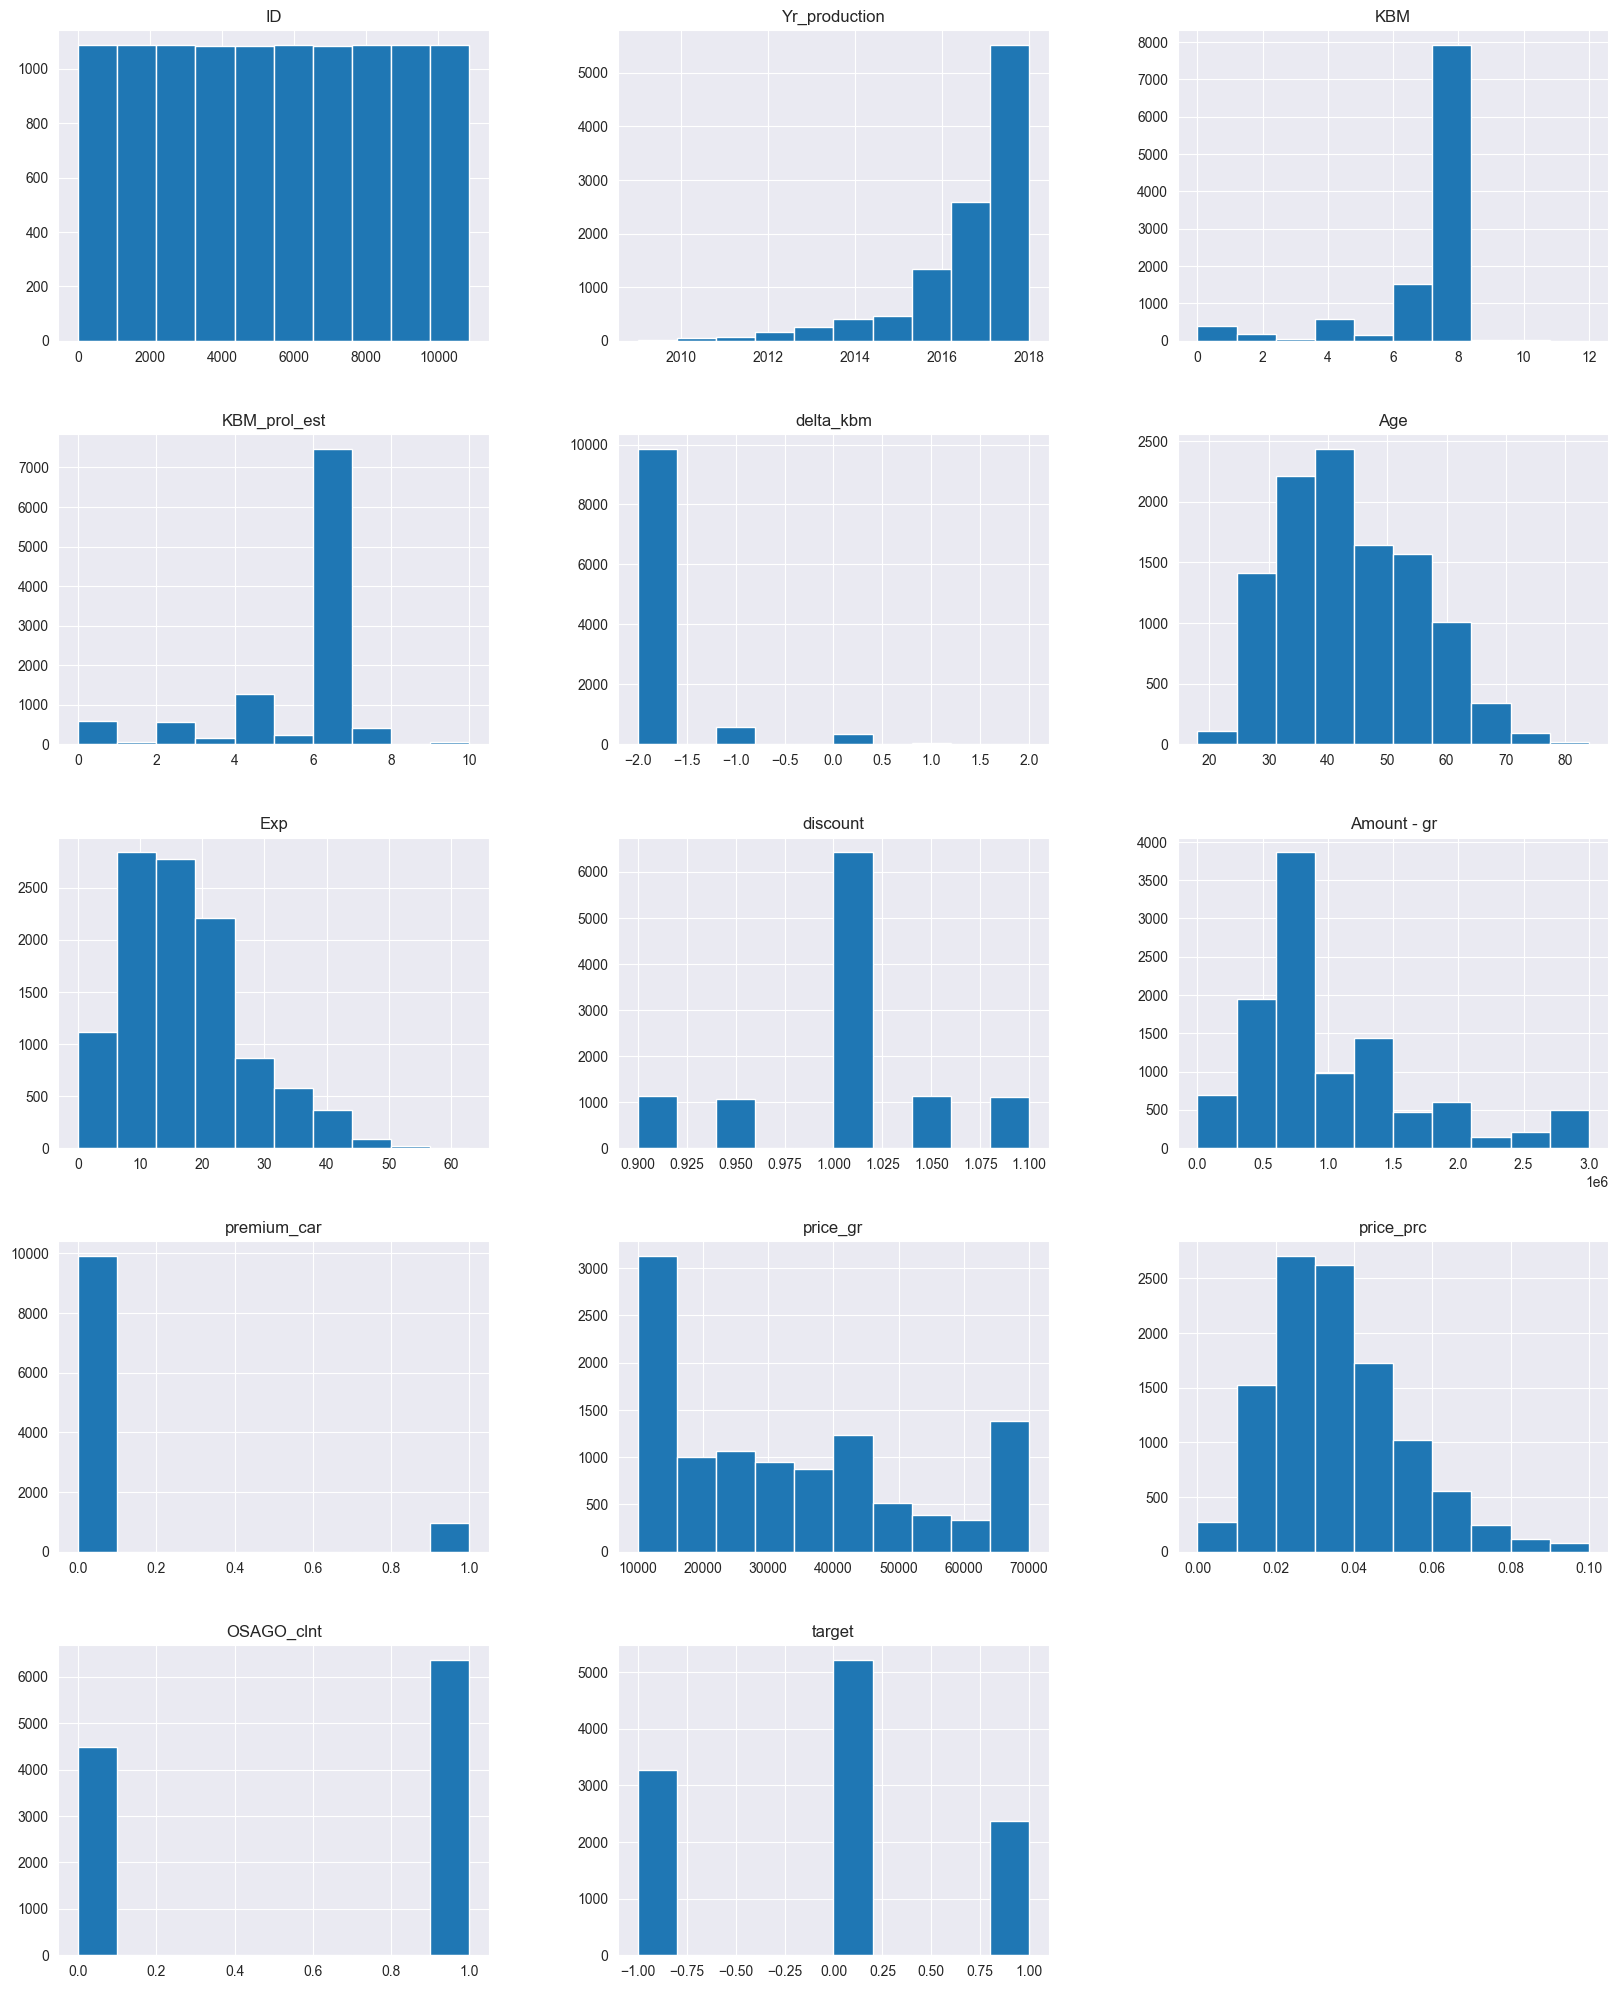

In [20]:
df.hist(figsize=(20, 25), layout=(-1, 3));

interval columns not set, guessing: ['ID', 'Yr_production', 'KBM', 'KBM_prol_est', 'delta_kbm', 'Age', 'Exp', 'discount', 'Amount - gr', 'premium_car', 'price_gr', 'price_prc', 'OSAGO_clnt', 'target']


<Axes: >

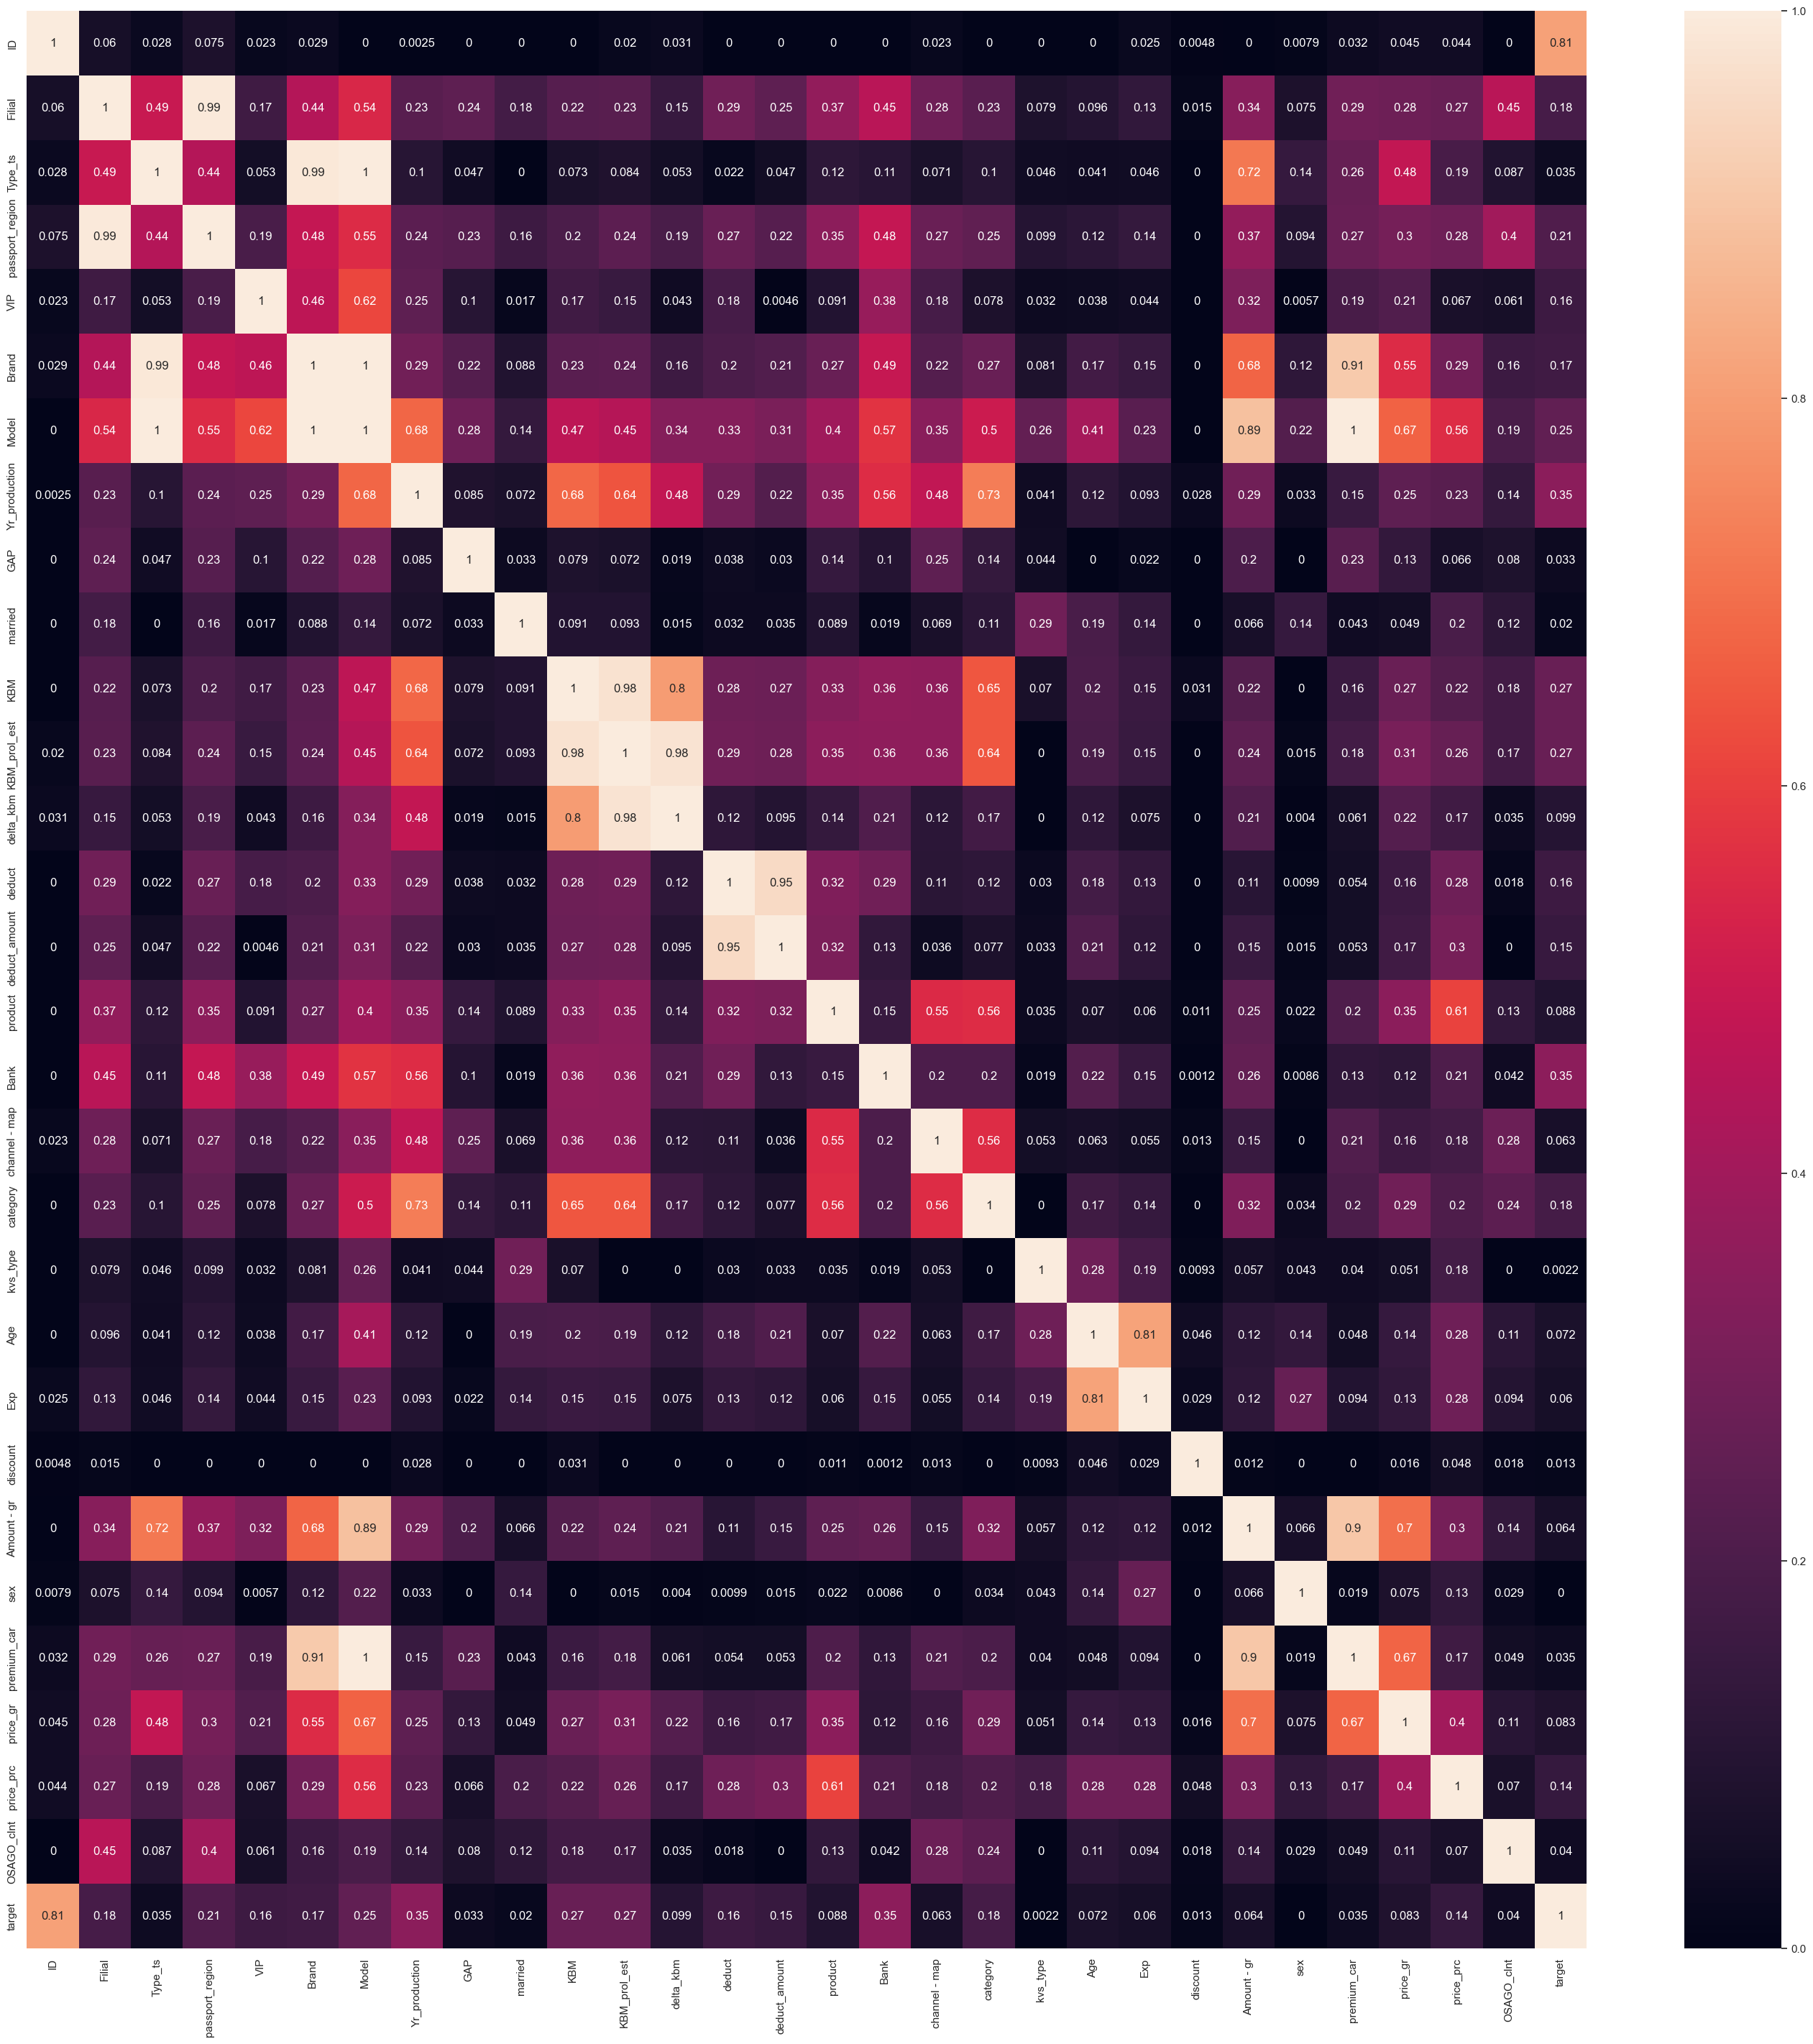

In [21]:
corr_matrix = df.phik_matrix()
sns.set(rc={'figure.figsize': (35, 35)})
sns.heatmap(corr_matrix, annot=True)

Имеются мультиколлинеарные признаки:

`['ID', 'passport_region', 'Type_ls',
'Brand', 'KBM_prol_est', 'delta_kbm',
'deduct_amount', 'Exp', 'Amount - gr',
'premium_car']`

и признаки, у которых отсутствует корреляция с таргетом:

`['GAP', 'married', 'product',
'channel - map', 'kvs_type',
'Age', 'discount', 'sex',
'price_gr', 'OSAGO_clnt']`

Проведем их исключение из тестовой выборки.

## ПОДГОТОВКА ДАННЫХ К ОБУЧЕНИЮ

In [22]:
# Разделение датасета на обучающую выборку и вычленение данных для предсказания
train = df[df['target'] != -1]
data_for_prediction = df[df['target'] == -1]

display(train.shape)
display(data_for_prediction.shape)

(7594, 30)

(3264, 30)

In [23]:
# Мультиколлинеарные признаки
multicollinear_features_to_drop = ['ID', 'passport_region', 'Type_ls',
                                   'Brand', 'KBM_prol_est', 'delta_kbm',
                                   'deduct_amount', 'Exp', 'Amount - gr',
                                   'premium_car']
# Признаки у которых нет корреляции с таргетом
not_correlation_features = ['GAP', 'married', 'product',
                            'channel - map', 'kvs_type',
                            'Age', 'discount', 'sex',
                            'price_gr', 'OSAGO_clnt']
# Тергет
target = ['target']
# Список численных признаков
num_features = ['KBM', 'price_prc']

# Список признаков для обучения моделей
filtered_features = [i for i in df.columns
                     if (i not in target and
                         i not in multicollinear_features_to_drop and
                         i not in not_correlation_features)]
# Категориальные признаки
cat_features = [i for i in filtered_features if i not in num_features]

display(f'filtered_features: {len(filtered_features)} {filtered_features}')
display(f'cat_features: {len(cat_features)} {cat_features}')
display(f'num_features: {len(num_features)} {num_features}')
display(f'target: {len(target)} {target}')

"filtered_features: 10 ['Filial', 'Type_ts', 'VIP', 'Model', 'Yr_production', 'KBM', 'deduct', 'Bank', 'category', 'price_prc']"

"cat_features: 8 ['Filial', 'Type_ts', 'VIP', 'Model', 'Yr_production', 'deduct', 'Bank', 'category']"

"num_features: 2 ['KBM', 'price_prc']"

"target: 1 ['target']"

In [24]:
# Данные для обучения
X = train[filtered_features]
# Таргет
y = train[target]

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(6075, 10)

(1519, 10)

(6075, 1)

(1519, 1)

## ОБУЧЕНИЕ МОДЕЛЕЙ

In [25]:
# Препроцессор для Логистической регрессии
numeric_preprocessor = Pipeline([
    ('standardscaler', StandardScaler())
])
categorical_preprocessor = Pipeline([
    ('binaryencoder', BinaryEncoder())
])
preprocessor_lr = ColumnTransformer([
    ('numeric', numeric_preprocessor, num_features),
    ('categorical', categorical_preprocessor, cat_features)
])

### Baseline

In [26]:
pipe_bl = Pipeline([
    ('preprocessor', preprocessor_lr),
    ('classifier', LogisticRegression(random_state=RANDOM_STATE))
])

param_grid = {}

base_line = GridSearchCV(pipe_bl,
                         param_grid=param_grid,
                         n_jobs=-1,
                         scoring='accuracy',
                         cv=5)

base_line.fit(X_train, y_train)
display(base_line.best_score_)

0.7213168724279836

### LogisticRegression

In [27]:
pipe_lr = Pipeline([
    ('preprocessor', preprocessor_lr),
    ('classifier', LogisticRegression(random_state=RANDOM_STATE))
])

param_grid = {
    'classifier__solver': ['lbfgs', 'liblinear']
}

model_lr = GridSearchCV(pipe_lr,
                        param_grid=param_grid,
                        n_jobs=-1,
                        scoring='accuracy',
                        cv=5)

model_lr.fit(X_train, y_train)
display(model_lr.best_params_)
display(model_lr.best_score_)

{'classifier__solver': 'liblinear'}

0.7224691358024692

### DecisionTreeClassifier

In [28]:
# Препроцессор для деревьев
categorical_preprocessor = Pipeline([
    ('binaryencoder', BinaryEncoder())
])
preprocessor_tree = ColumnTransformer([
    ('categorical', categorical_preprocessor, cat_features)
])

In [29]:
pipe_dt = Pipeline([
    ('preprocessor', preprocessor_tree),
    ('classifier', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = {
    'classifier__max_depth': [5, 10, 50, 100, 1000],
}

model_dt = GridSearchCV(pipe_dt,
                        param_grid=param_grid,
                        n_jobs=-1,
                        scoring='accuracy',
                        cv=5)

model_dt.fit(X_train, y_train)
display(model_dt.best_params_)
display(model_dt.best_score_)

{'classifier__max_depth': 5}

0.7252674897119342

### RandomForestClassifier

In [30]:
pipe_rf = Pipeline([
    ('preprocessor', preprocessor_tree),
    ('classifier', RandomForestClassifier(random_state=RANDOM_STATE))
])

param_grid = {
    'classifier__n_estimators': [5, 10, 50, 100],
    'classifier__max_depth': [5, 10, 50, 100]
}

model_rf = GridSearchCV(pipe_rf,
                        param_grid=param_grid,
                        n_jobs=-1,
                        scoring='accuracy',
                        cv=5)

model_rf.fit(X_train, y_train)
display(model_rf.best_params_)
display(model_rf.best_score_)

{'classifier__max_depth': 5, 'classifier__n_estimators': 50}

0.7216460905349795

### Catboost

In [31]:
model_cbc = CatBoostClassifier(cat_features=cat_features,
                               n_estimators=200,
                               random_state=RANDOM_STATE,
                               eval_metric='Accuracy',
                               verbose=500)

param_grid = {
        'learning_rate': [0.01, 0.05, 0.1, 1],
        'depth': [5, 10, 50, 100]
}

grid_search_result = model_cbc.grid_search(param_grid,
                                           X_train,
                                           y_train,
                                           cv=5)

display(model_cbc.best_score_)
display(grid_search_result['params'])

0:	learn: 0.6905350	test: 0.6839506	best: 0.6839506 (0)	total: 172ms	remaining: 34.2s
199:	learn: 0.7279835	test: 0.7316872	best: 0.7316872 (185)	total: 5.24s	remaining: 0us

bestTest = 0.7316872428
bestIteration = 185

0:	loss: 0.7316872	best: 0.7316872 (0)	total: 5.28s	remaining: 1m 19s
0:	learn: 0.6905350	test: 0.6839506	best: 0.6839506 (0)	total: 12.8ms	remaining: 2.55s
199:	learn: 0.7524691	test: 0.7316872	best: 0.7341564 (154)	total: 4.96s	remaining: 0us

bestTest = 0.7341563786
bestIteration = 154

1:	loss: 0.7341564	best: 0.7341564 (1)	total: 10.3s	remaining: 1m 11s
0:	learn: 0.6905350	test: 0.6839506	best: 0.6839506 (0)	total: 45.9ms	remaining: 9.13s
199:	learn: 0.7699588	test: 0.7283951	best: 0.7366255 (122)	total: 5.79s	remaining: 0us

bestTest = 0.7366255144
bestIteration = 122

2:	loss: 0.7366255	best: 0.7366255 (2)	total: 16.1s	remaining: 1m 9s
0:	learn: 0.6905350	test: 0.6839506	best: 0.6839506 (0)	total: 13ms	remaining: 2.58s
199:	learn: 0.8923868	test: 0.6757202	best: 

{'learn': {'Accuracy': 0.7641152263374485, 'Logloss': 0.4908513207620679}}

{'depth': 5, 'learning_rate': 0.1}

### XGBoost

In [32]:
pipe_xgb = Pipeline([
    ('preprocessor', preprocessor_lr),
    ('classifier', xgb.XGBClassifier(n_estimators=200))
])

param_grid = {
    'classifier__learning_rate': [0.01, 0.05, 0.1, 1],
    'classifier__max_depth': [5, 10, 50, 100]
}

model_xgb = GridSearchCV(pipe_xgb,
                         param_grid=param_grid,
                         n_jobs=-1,
                         scoring='accuracy',
                         cv=5)

model_xgb.fit(X_train, y_train)
display(model_xgb.best_params_)
display(model_xgb.best_score_)

{'classifier__learning_rate': 0.01, 'classifier__max_depth': 5}

0.7244444444444444

### Вывод

По итогу обучения и валидации моделей лучший результат по Accuracy у модели CatBoostClassifier:

Метрика и функция потерь: `{'learn': {'Accuracy': 0.7641152263374485, 'Logloss': 0.4908513207620679}}`

Гиперпараметры: `{'depth': 5, 'learning_rate': 0.1}`

### ПРОВЕРКА НА ТЕСТОВОЙ ВЫБОРКЕ

In [33]:
model_cbc = CatBoostClassifier(cat_features=cat_features,
                               n_estimators=200,
                               depth=5,
                               learning_rate=0.1,
                               random_state=RANDOM_STATE,
                               eval_metric='Accuracy',
                               verbose=100)

model_cbc.fit(X_train, y_train,
              plot=False)

y_pred = model_cbc.predict(X_test)
display(f'Accuracy: {accuracy_score(y_test, y_pred)}')

0:	learn: 0.7264198	total: 28.9ms	remaining: 5.74s
100:	learn: 0.7473251	total: 2.67s	remaining: 2.62s
199:	learn: 0.7641152	total: 5.1s	remaining: 0us


'Accuracy: 0.7287689269256089'

In [34]:
pipe_bl = Pipeline([
    ('preprocessor', preprocessor_lr),
    ('classifier', LogisticRegression(random_state=RANDOM_STATE))
])


pipe_bl.fit(X_train, y_train)

y_pred = pipe_bl.predict(X_test)
display(f'Accuracy: {accuracy_score(y_test, y_pred)}')

'Accuracy: 0.7340355497037525'

### ИНФЕРЕНС

In [37]:
# Данные для предсказания
X_pred = data_for_prediction[filtered_features].reset_index(drop=True)
X_pred

Filial        Type_ts          VIP           Model  \
0        Московский    Иностранные  Без статуса           CRETA   
1        Московский    Иностранные  Без статуса           RAV 4   
2        Московский    Иностранные  Без статуса           CRETA   
3         Казанский    Иностранные  Без статуса         SORENTO   
4     Нижегородский  Отечественные  Без статуса         PATRIOT   
...             ...            ...          ...             ...   
3259    Кемеровский    Иностранные  Без статуса  GRAND SANTA FE   
3260       Ижевский  Отечественные  Без статуса          GRANTA   
3261  Новосибирский    Иностранные  Без статуса          CERATO   
3262     Ростовский  Отечественные  Без статуса          GRANTA   
3263   Белгородский    Иностранные  Без статуса          CERATO   

      Yr_production  KBM                deduct       Bank category  price_prc  
0              2017    8          Без франшизы       Банк   NB 0-1      0.025  
1              2015    8          Без франшизы  Без банка  RN sppg      0.040  
2              2018    8          Без франшизы       Банк   NB 0-1      0.025  
3              2016    6          Без франшизы       Банк  RN sppg      0.010  
4              2016    6  Безусловная франшиза       Банк       RN      0.020  
...             ...  ...                   ...        ...      ...        ...  
3259           2018    8          Без франшизы       Банк   NB 0-1      0.035  
3260           2016    4          Без франшизы    Сетелем       RN      0.080  
3261           2017    8          Без франшизы       Банк       RN      0.010  
3262           2018    8          Без франшизы       Банк   NB 0-1      0.050  
3263           2018    8          Без франшизы    Сетелем   NB 0-1      0.015  

[3264 rows x 10 columns]

In [38]:
model_cbc = CatBoostClassifier(cat_features=cat_features,
                               n_estimators=200,
                               depth=5,
                               learning_rate=0.1,
                               random_state=RANDOM_STATE,
                               eval_metric='Accuracy',
                               verbose=100)

model_cbc.fit(X, y,
              plot=False)

y_pred = model_cbc.predict(X_pred)

0:	learn: 0.7220174	total: 26.7ms	remaining: 5.31s
100:	learn: 0.7449302	total: 10.7s	remaining: 10.5s
199:	learn: 0.7586252	total: 14.3s	remaining: 0us


In [49]:
result_df = pd.DataFrame(y_pred, columns=['target'], index=data_for_prediction.index)
display(result_df)

target
7598        0
7599        0
7600        0
7601        0
7602        0
...       ...
10858       0
10859       0
10860       0
10861       0
10862       0

[3264 rows x 1 columns]

target
0         2644
1          620
Name: count, dtype: int64

In [51]:
result = data_for_prediction.drop(target, axis=1).join(result_df)
result

ID         Filial        Type_ts        passport_region  \
7598    7599     Московский    Иностранные                 Москва   
7599    7600     Московский    Иностранные     Московская область   
7600    7601     Московский    Иностранные                 Москва   
7601    7602      Казанский    Иностранные   Республика Татарстан   
7602    7603  Нижегородский  Отечественные  Нижегородская область   
...      ...            ...            ...                    ...   
10858  10859    Кемеровский    Иностранные    Кемеровская область   
10859  10860       Ижевский  Отечественные  Удмуртская Республика   
10860  10861  Новосибирский    Иностранные   Белгородская область   
10861  10862     Ростовский  Отечественные     Ростовская область   
10862  10863   Белгородский    Иностранные   Белгородская область   

               VIP    Brand           Model  Yr_production  GAP  \
7598   Без статуса  HYUNDAI           CRETA           2017   Да   
7599   Без статуса   TOYOTA           RAV 4           2015  Нет   
7600   Без статуса  HYUNDAI           CRETA           2018  Нет   
7601   Без статуса      KIA         SORENTO           2016  Нет   
7602   Без статуса      UAZ         PATRIOT           2016  Нет   
...            ...      ...             ...            ...  ...   
10858  Без статуса  HYUNDAI  GRAND SANTA FE           2018  Нет   
10859  Без статуса     LADA          GRANTA           2016  Нет   
10860  Без статуса      KIA          CERATO           2017   Да   
10861  Без статуса     LADA          GRANTA           2018  Нет   
10862  Без статуса      KIA          CERATO           2018  Нет   

                  married  KBM  KBM_prol_est  delta_kbm                deduct  \
7598      Состоит в браке    8             6         -2          Без франшизы   
7599      Состоит в браке    8             6         -2          Без франшизы   
7600   Не состоит в браке    8             6         -2          Без франшизы   
7601      Состоит в браке    6             4         -2          Без франшизы   
7602   Не состоит в браке    6             4         -2  Безусловная франшиза   
...                   ...  ...           ...        ...                   ...   
10858     Состоит в браке    8             6         -2          Без франшизы   
10859  Не состоит в браке    4             2         -2          Без франшизы   
10860     Состоит в браке    8             6         -2          Без франшизы   
10861     Состоит в браке    8             6         -2          Без франшизы   
10862     Состоит в браке    8             6         -2          Без франшизы   

      deduct_amount   product       Bank channel - map category  \
7598              0    Legacy       Банк       Розница   NB 0-1   
7599              0  Классика  Без банка       Розница  RN sppg   
7600              0  Классика       Банк    Автосалоны   NB 0-1   
7601              0   Компакт       Банк       Розница  RN sppg   
7602         20000+  Классика       Банк    Автосалоны       RN   
...             ...       ...        ...           ...      ...   
10858             0  Классика       Банк    Автосалоны   NB 0-1   
10859             0  Классика    Сетелем    Автосалоны       RN   
10860             0   Компакт       Банк    Автосалоны       RN   
10861             0  Классика       Банк    Автосалоны   NB 0-1   
10862             0   Компакт    Сетелем    Автосалоны   NB 0-1   

                        kvs_type  Age  Exp  discount  Amount - gr sex  \
7598   Водители согласно перечню   40   20      1.00      1000000   M   
7599   Водители согласно перечню   61   20      1.10      1000000   F   
7600   Водители согласно перечню   49   12      0.95      1200000   M   
7601   Водители согласно перечню   47   24      1.00       800000   M   
7602   Водители согласно перечню   44   23      1.00       600000   M   
...                          ...  ...  ...       ...          ...  ..   
10858  Водители согласно перечню   44   21      1.00      1800000   M   
10859  Водител

In [56]:
result.to_excel('predictions.xlsx')